In [1]:
import cv2
import pandas as pd
from collections import Counter
import glob
from pytube import YouTube
from skimage import io
import matplotlib.pyplot as plt

In [2]:
classNames = {0: 'background',
              1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
              7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
              13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
              18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
              24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
              32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
              37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
              41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
              46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
              51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
              56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
              61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
              67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
              75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
              80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
              86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

In [3]:
def id_class_name(class_id, classes):
    for key, value in classes.items():
        if class_id == key:
            return value

In [4]:
# Loading model
model = cv2.dnn.readNetFromTensorflow('models/frozen_inference_graph.pb',
                                      'models/ssd_mobilenet_v2_coco_2018_03_29.pbtxt')

In [5]:
def class_image(image_path):
    count=[]
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    model.setInput(cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True))
    output = model.forward()
    # print(output[0,0,:,:].shape)
    for detection in output[0, 0, :, :]:
        confidence = detection[2]
        if confidence > .7:
            class_id = detection[1]
            class_name=id_class_name(class_id,classNames)
            count.append(class_name)
    c=Counter(count)
    d = dict.fromkeys(classNames.values())
    d.update(c)
    df = pd.DataFrame.from_dict(d, orient="index", columns=['frame']).transpose()
    return df

In [6]:
im_list=glob.glob('*.jpg')
count_df=pd.DataFrame(columns = classNames.values())
for i in im_list:
    df=class_image(i)
    count_df=count_df.append(df,ignore_index=True)
    
    
    

In [7]:
found=count_df.dropna(axis='columns',how='all')
found=found.fillna(0)
found=found.set_index([list(range(0,3841,20))])
found.head()

,airplane,bird,cat,horse,cow,elephant,bear,vase,teddy bear
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
found.iloc[22]

airplane      1.0
bird          0.0
cat           0.0
horse         0.0
cow           0.0
elephant      0.0
bear          0.0
vase          0.0
teddy bear    0.0
Name: 440, dtype: float64

In [12]:
im_list[22]

'frame1380.jpg'

In [97]:
found[found['airplane']==1]

,airplane,bird,cat,horse,cow,elephant,bear,vase,teddy bear
440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
found[found['teddy bear']==1]

,airplane,bird,cat,horse,cow,elephant,bear,vase,teddy bear
1660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


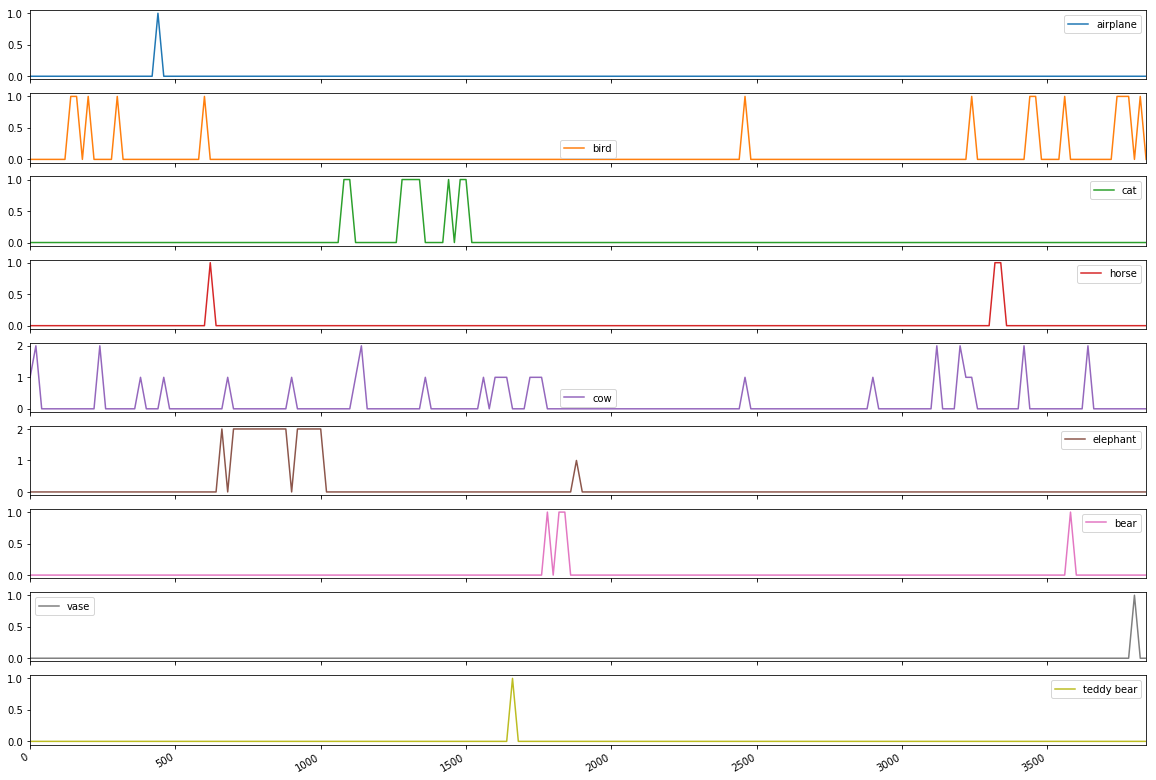

In [94]:
found.plot.line(figsize=(20,15),xticks=subplots=True)
plt.show()

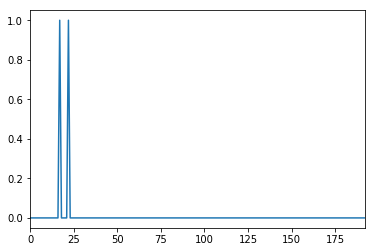

In [77]:
found.airplane.plot(kind='line')
plt.show()

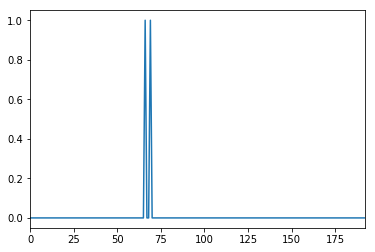

In [78]:
found.bench.plot('line')
plt.show()

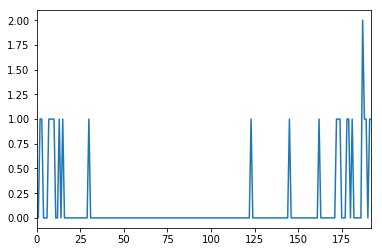

In [79]:
found.bird.plot(kind='line')
plt.show()

In [65]:
YouTube('https://www.youtube.com/watch?v=MCDEaU8lPv8').streams.first().download(r'C:\Users\sam2146\Documents\ExploreOpencvDnn\images')

'C:\\Users\\sam2146\\Documents\\ExploreOpencvDnn\\images\\Parking lot filling up.mp4'

In [17]:
YouTube('https://www.youtube.com/watch?v=S9YEC6ru9lQ&list=PLkAmZAcQ2jdre8fvASito9a9JjbmZAp5C&index=2').streams.first().download(r'C:\Users\sam2146\Documents\ExploreOpencvDnn\images')

'C:\\Users\\sam2146\\Documents\\ExploreOpencvDnn\\images\\Happy Valentine&39s Day from Exploreorg.mp4'

In [18]:
# Function to extract frames 
def FrameCapture(path): 
      
    # Path to video file 
    vidObj = cv2.VideoCapture(path) 
  
    # Used as counter variable 
    count = 0
  
    # checks whether frames were extracted 
    success = 1
  
    while success: 
  
        # vidObj object calls read 
        # function extract frames 
        success, image = vidObj.read() 
        if count%20==0:
        # Saves the frames with frame-count 
            cv2.imwrite("frame%d.jpg" % count, image) 
  
        count += 1
    # Driver Code 
if __name__ == '__main__': 
  
    # Calling the function 
    FrameCapture(r"C:\Users\sam2146\Documents\ExploreOpencvDnn\images\Happy Valentine&39s Day from Exploreorg.mp4") 